In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
dataset = pd.DataFrame(data=boston.data, columns=boston.feature_names)
labels = pd.DataFrame(data=boston.target, columns=["MEDV"])

In [21]:
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [29]:
labels.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [18]:
# labels.head(3)

In [23]:
def two_var_scatter(independent_feature, dependent_feature="MEDV"):
    """ Take two features across our DataFrame and produce scatterplot of features. """
    if dependent_feature == "MEDV":
        plt.scatter(dataset[independent_feature], labels[dependent_feature])
    else:
        plt.scatter(dataset[independent_feature], dataset[dependent_feature])
    plt.xlabel(independent_feature)
    plt.ylabel(dependent_feature)

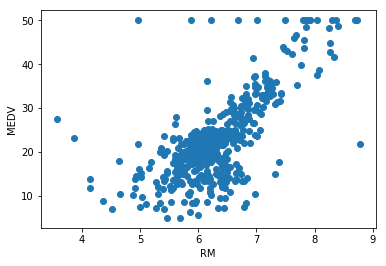

In [28]:
two_var_scatter("RM")

## Credit to Aakash for Corrplot heatmap

In [30]:
def _value_to_category(value):
    """ Helper function to convert numerical values between -1.0 and 1.0 to discretized categories. """
    _categorical_types, _value_ranges_test = ["- (S)", "- (M)", "- (W)", "0", "+ (W)", "+ (M)", "+ (S)"], [-1.0, -0.7, -0.4, -0.1, 0.1, 0.4, 0.7, 1.0]
    # Iterates through value ranges and checks if value falls within specific range
    for index in range(len(_value_ranges_test) - 1):
        if float(value) >= _value_ranges_test[index] and float(value) < _value_ranges_test[index + 1]:
            return _categorical_types[index]

def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

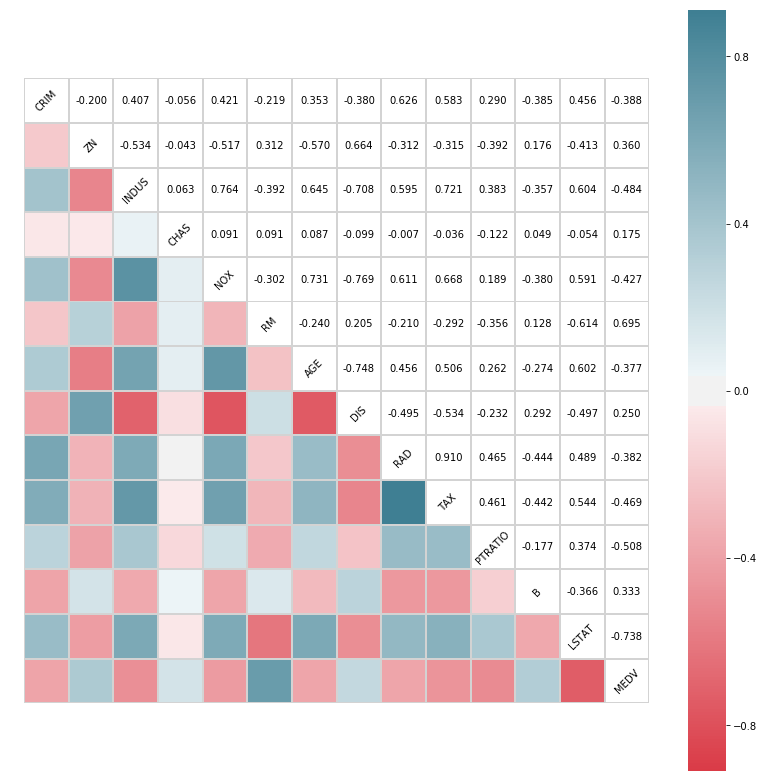

In [35]:
df = pd.concat([dataset, labels], axis=1)

corrplot_(df, fontsize=12)

## The major dataset feature we want to work with (at first) is `LSTAT` since it is best correlated with our target label `MEDV`.

---

### STEP 1: Create our X- and y- data.

In [142]:
X, y = dataset[["LSTAT"]], np.array(labels["MEDV"])

### STEP 2: Split our data into training and testing samples.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/natepill/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### STEP 3: Instantiate and train (`fit`) our `LinearRegression` model.

In [144]:
model_LinReg = LinearRegression()

In [145]:
model_LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### STEP 4: Produce predictions based off of test data.

In [146]:
y_pred = model_LinReg.predict(X_test)

### AAKASH: QUICK EXAMPLE: Why Using Classification-Based Error Does Not Work With Regression Problems!

In [148]:
error_counter = 0

for index, item in enumerate(y_pred):
    if item != y_test[index]:
        error_counter += 1
        
print("Our Error Rate = {}%".format((error_counter / len(y_pred)) * 100))

Our Error Rate = 100.0%


### STEP 5: Calculate error metrics for Linear Regression model.

In [149]:
MSE, RSq = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

In [150]:
MSE, RSq

(36.948018466459175, 0.5371048291478614)

### STEP 6: Get accuracy and linear regression equation constants from model.

In [151]:
accuracy = model_LinReg.score(X_test, y_test)
print("Our model accuracy is approximately {:.2f}%".format(100 * accuracy))

Our model accuracy is approximately 53.71%


### STEP 7: Get slopes (`weights`) and y-intercept (`initial_condition`) of equation from model and construct model equation.

In [152]:
weights, initial_condition = model_LinReg.coef_, model_LinReg.intercept_

In [157]:
print("MODEL: y(X) = {:.2f}X + {:.2f}".format(weights[0], initial_condition))

MODEL: y(X) = -0.93X + 34.51


### STEP 8: Visualize our regression line(s) across our independent variables.

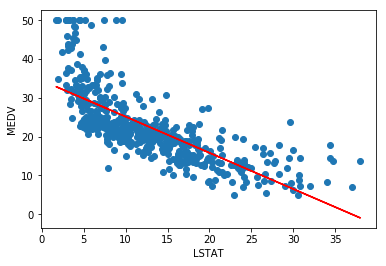

In [154]:
independent_var = "LSTAT"

two_var_scatter(independent_var)
y_fit = weights[0] * dataset[independent_var] + initial_condition
plt.plot(dataset[independent_var], y_fit, c="r")

## Let's now look at the two highest correlated features to `MEDV`: `LSTAT` and `RM`.

---

In [200]:
global_accuracy = 0

for iteration in range(100):
    X, y = dataset[["LSTAT", "RM"]], np.array(labels["MEDV"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model_LinReg = LinearRegression()
    model_LinReg.fit(X_train, y_train)

    y_pred = model_LinReg.predict(X_test)

    accuracy = model_LinReg.score(X_test, y_test)
    global_accuracy += accuracy
    
print("Our model accuracy is approximately {:.2f}%.\n".format(global_accuracy))

# weights, initial_condition = model_LinReg.coef_, model_LinReg.intercept_
# print("MODEL: y(X1, X2) = {:.2f}X1 + {:.2f}X2 + {:.2f}".format(weights[0], weights[1], initial_condition))

Our model accuracy is approximately 62.13%.



## Pass _all independent features_ to our model
---

In [202]:
global_accuracy = 0

for iteration in range(100):
    X, y = dataset, np.array(labels["MEDV"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model_LinReg = LinearRegression()
    model_LinReg.fit(X_train, y_train)

    y_pred = model_LinReg.predict(X_test)

    accuracy = model_LinReg.score(X_test, y_test)
    global_accuracy += accuracy
    
print("Our model accuracy is approximately {:.2f}%.\n".format(global_accuracy))

Our model accuracy is approximately 70.74%.

